In [73]:
from mgmt.model.multiresolution import MultiResolutionWithMask
from mgmt.model.basic_backbone import BasicBackbone
%load_ext autoreload
%autoreload 2

from mgmt.data.pickle import load_subject_pickles
from mgmt.visualize.subject import plot_subject_with_label, plot_volume, plot_subject

import torchio as tio
from mgmt.data.subject_transforms import CropLargestTumor
import torch

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [74]:
subjects = load_subject_pickles(
    "/home/bryan/expr/brain_tumor/preprocess-subjects-v2/resample-1.5-crop-64",
    "MGMT-006878"
)

loading subjects from pickles: 100%|██████████████████████████████████████| 653/653 [00:00<00:00, 14016.43it/s]


In [75]:
subject = subjects[0]

In [78]:
subject.shape

(1, 94, 118, 96)

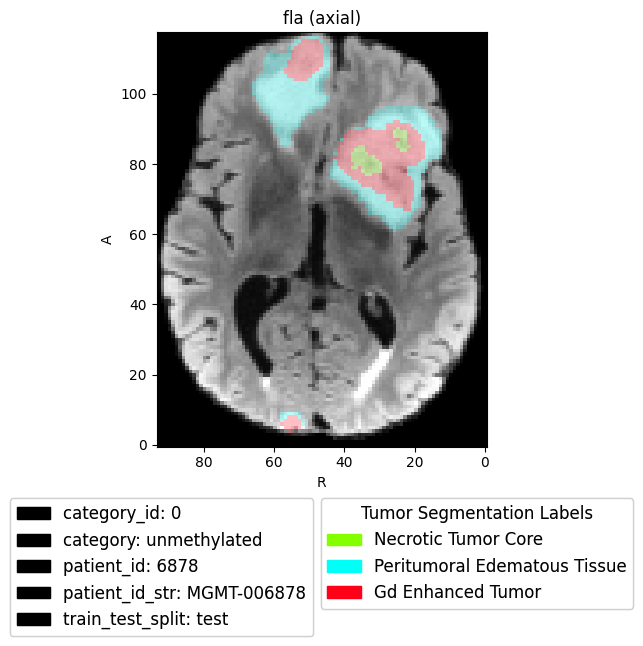

In [79]:
plot_subject_with_label(subject, show=True, add_metadata=True, add_tumor_legend=True, single_axis="axial", subject_include=["fla"]);

In [80]:
backbone = BasicBackbone(dropout=0.1)
model = MultiResolutionWithMask(backbone)

In [54]:
transforms = CropLargestTumor(crop_dim=[96, 96, 96])

In [55]:
dataset = tio.SubjectsDataset(subjects, transform=transforms)

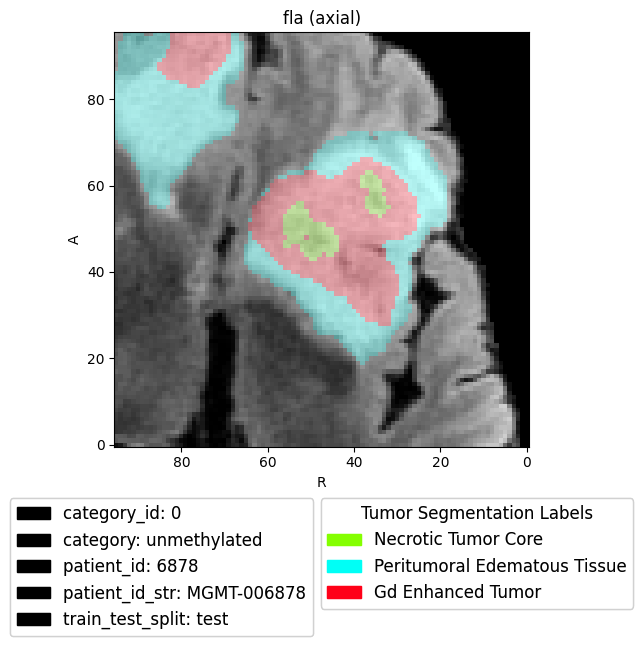

In [56]:
plot_subject_with_label(dataset[0], show=True, add_metadata=True, add_tumor_legend=True, single_axis="axial", subject_include=["fla"]);

In [57]:
input_tensor = torch.unsqueeze(dataset[0].fla.tensor, 0) # N, C, H, W, D

In [58]:
tumor_mask = dataset[0].tumor.tensor
tumor_mask = (tumor_mask > 0).type(torch.float32)
tumor_mask = torch.unsqueeze(tumor_mask, 0)

In [60]:
output = model(input_tensor, tumor_mask)

In [63]:
for k,v in output.items():
    print(k, v.shape)

l1 torch.Size([1, 1, 1, 1, 1])
l2 torch.Size([1, 1, 1, 1, 1])
l3 torch.Size([1, 1, 1, 1, 1])
l4 torch.Size([1, 1, 1, 1, 1])
l5 torch.Size([1, 1, 1, 1, 1])
final torch.Size([1, 1, 1, 1, 1])


In [64]:
output["final"].view(1, -1).shape

torch.Size([1, 1])

In [67]:
model.heads.keys()

odict_keys(['l1', 'l2', 'l3', 'l4', 'l5', 'final'])

In [69]:
loss = torch.tensor(10)

In [70]:
loss

tensor(10)

In [71]:
0 + loss

tensor(10)

In [87]:
model.backbone.blocks["l1"][0].conv.weight

Parameter containing:
tensor([[[[[-0.1304, -0.1742, -0.0071],
           [ 0.0668,  0.1914,  0.0911],
           [ 0.1356, -0.1804, -0.0064]],

          [[ 0.1048, -0.1729, -0.0117],
           [ 0.1227,  0.1523,  0.0387],
           [-0.1303, -0.1204,  0.1726]],

          [[-0.0599, -0.1691,  0.1743],
           [ 0.0316, -0.0281,  0.1499],
           [-0.1136,  0.1021,  0.0461]]]],



        [[[[-0.0808,  0.0620, -0.0890],
           [ 0.0749, -0.0510,  0.1417],
           [ 0.1736,  0.1034, -0.1681]],

          [[ 0.0142, -0.1061,  0.1403],
           [-0.1825,  0.1071,  0.0991],
           [-0.0636,  0.1402, -0.1418]],

          [[-0.0637,  0.0417, -0.1802],
           [-0.0423, -0.0474,  0.0694],
           [-0.0647, -0.1757,  0.0155]]]],



        [[[[-0.1857, -0.1036,  0.0947],
           [-0.1856, -0.0299, -0.0042],
           [-0.0465,  0.1656, -0.0670]],

          [[-0.0520,  0.0863,  0.0155],
           [ 0.1300,  0.1310, -0.1814],
           [-0.0477, -0.0024, -0.066

In [93]:
model.backbone.blocks["l1"][0].conv

Conv3d(1, 16, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))

In [95]:
model.backbone.blocks["l1"][0].conv.bias.shape

torch.Size([16])

In [101]:
from typing import Type, Union
from torch import nn
conv_type = (nn.Conv1d, nn.Conv2d, nn.Conv3d)

In [102]:
conv_type

(torch.nn.modules.conv.Conv1d,
 torch.nn.modules.conv.Conv2d,
 torch.nn.modules.conv.Conv3d)

In [103]:
isinstance(model.backbone.blocks["l1"][0].conv, conv_type)

True